Data generated successfully.


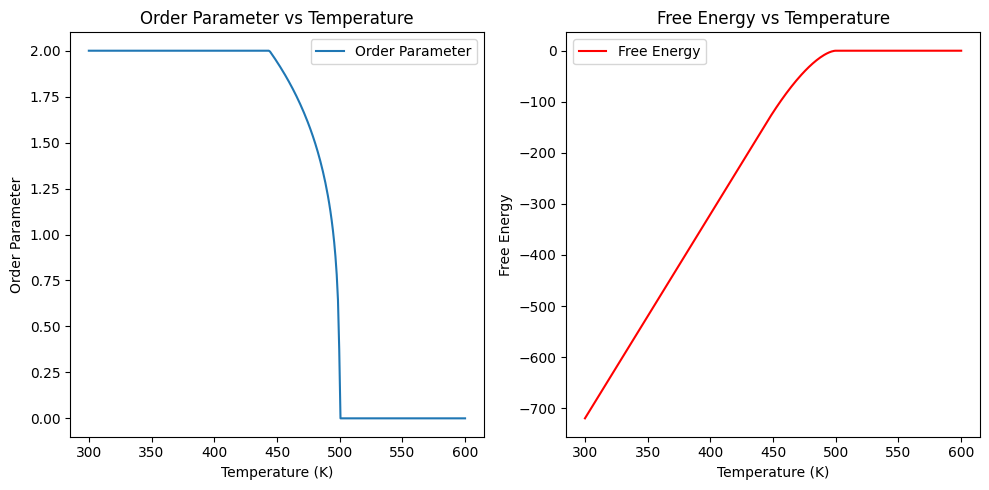

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Parameters for the Landau model
a0 = 1.0
b = 1.0
c = 1.0
Tc = 500  # Critical temperature

# Define the free energy function
def free_energy(phi, T):
    a_T = a0 * (T - Tc)
    return a_T * phi**2 + b * phi**4 + c * phi**6

# Temperature range for simulation
temperatures = np.linspace(300, 600, 300)

# Find the order parameter that minimizes the free energy for each temperature
data = []

for T in temperatures:
    res = minimize(free_energy, 0.1, args=(T,), bounds=[(-2, 2)])  # Initial guess changed to 0.1
    phi = res.x[0]
    F = res.fun
    data.append([T, phi, F])

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Temperature', 'Order_Parameter', 'Free_Energy'])
df.to_csv('landau_data.csv', index=False)

# Check if the data contains all zeros
if (df[['Order_Parameter', 'Free_Energy']] == 0).all().all():
    print("All zeros detected in the data.")
else:
    print("Data generated successfully.")

# Plot results for verification
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df['Temperature'], df['Order_Parameter'], label='Order Parameter')
plt.xlabel('Temperature (K)')
plt.ylabel('Order Parameter')
plt.title('Order Parameter vs Temperature')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['Temperature'], df['Free_Energy'], label='Free Energy', color='r')
plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy')
plt.title('Free Energy vs Temperature')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
# Example of loading experimental data
df_exp = pd.read_csv('experimental_data.csv')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Load synthetic data
df = pd.read_csv('landau_data.csv')

# Split data into features and target
X = df[['Temperature']]
y_phi = df['Order_Parameter']
y_F = df['Free_Energy']

# Split data into training and test sets
X_train, X_test, y_phi_train, y_phi_test = train_test_split(X, y_phi, test_size=0.2, random_state=42)
_, _, y_F_train, y_F_test = train_test_split(X, y_F, test_size=0.2, random_state=42)

In [5]:
# Train a RandomForest model for Order Parameter
rf_phi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_phi.fit(X_train, y_phi_train)

# Train a RandomForest model for Free Energy
rf_F = RandomForestRegressor(n_estimators=100, random_state=42)
rf_F.fit(X_train, y_F_train)

RandomForestRegressor(random_state=42)

In [6]:
# Predict and evaluate Order Parameter model
y_phi_pred = rf_phi.predict(X_test)
mse_phi = mean_squared_error(y_phi_test, y_phi_pred)
print(f'Mean Squared Error for Order Parameter: {mse_phi}')

# Predict and evaluate Free Energy model
y_F_pred = rf_F.predict(X_test)
mse_F = mean_squared_error(y_F_test, y_F_pred)
print(f'Mean Squared Error for Free Energy: {mse_F}')

Mean Squared Error for Order Parameter: 3.4403066827601005e-05
Mean Squared Error for Free Energy: 4.6609216688810395


In [7]:
# Example prediction
T_new = np.array([[550]])
phi_pred = rf_phi.predict(T_new)
F_pred = rf_F.predict(T_new)

print(f'Predicted Order Parameter at T=550K: {phi_pred[0]}')
print(f'Predicted Free Energy at T=550K: {F_pred[0]}')

Predicted Order Parameter at T=550K: -2.7030246586177565e-09
Predicted Free Energy at T=550K: 1.4798532985057735e-13


/Users/juntangwang/PycharmProjects/materialGroup/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/juntangwang/PycharmProjects/materialGroup/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


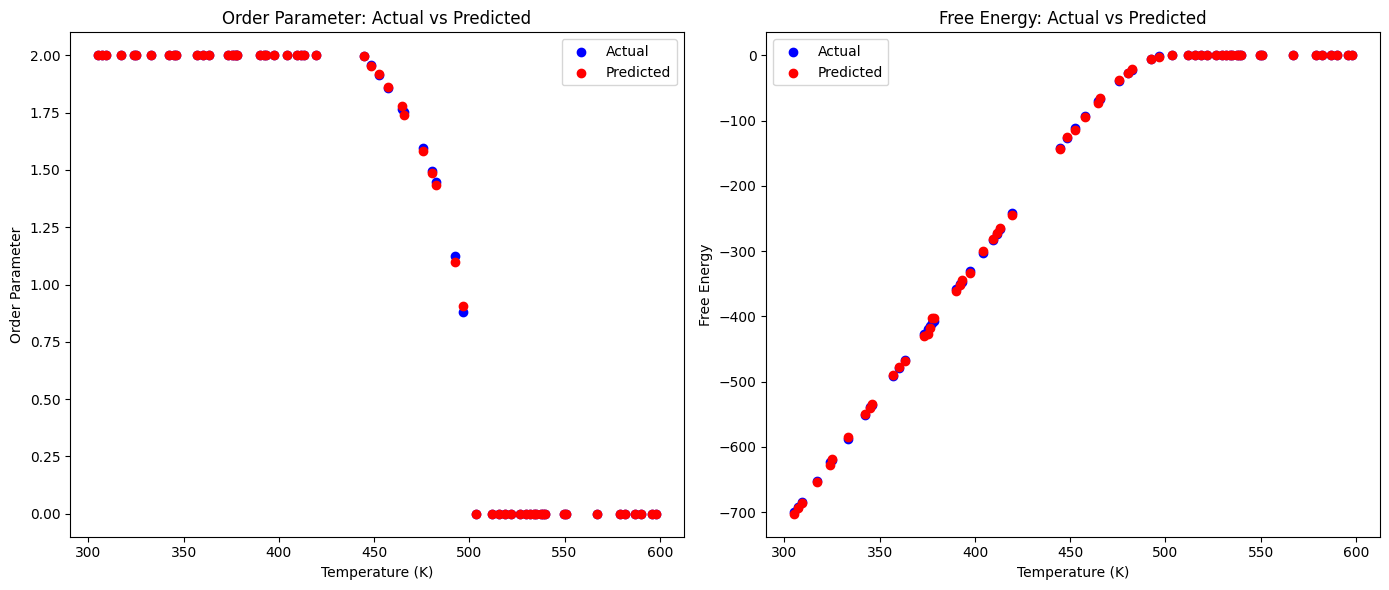

In [8]:
# Plot predictions vs. actual data
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Order Parameter
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_phi_test, color='blue', label='Actual')
plt.scatter(X_test, y_phi_pred, color='red', label='Predicted')
plt.xlabel('Temperature (K)')
plt.ylabel('Order Parameter')
plt.title('Order Parameter: Actual vs Predicted')
plt.legend()

# Free Energy
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_F_test, color='blue', label='Actual')
plt.scatter(X_test, y_F_pred, color='red', label='Predicted')
plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy')
plt.title('Free Energy: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

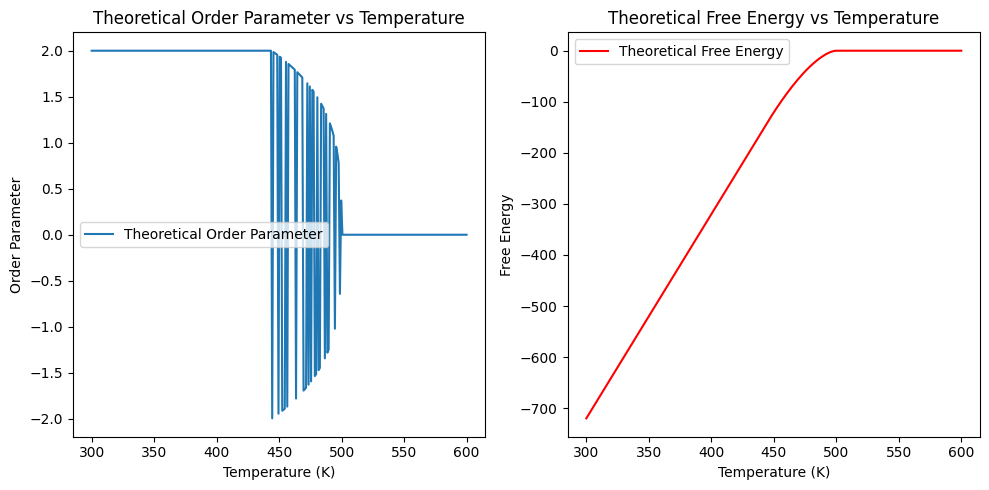

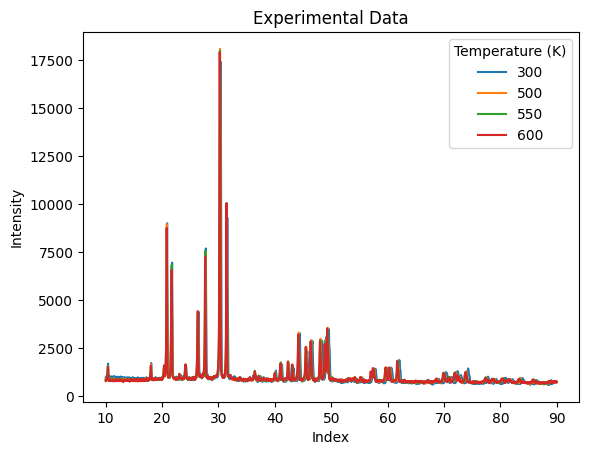

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load experimental data
experimental_data = pd.read_csv('experimental_data.csv', index_col=0)

# Parameters for the Landau model
a0 = 1.0
b = 1.0
c = 1.0
Tc = 500  # Critical temperature

# Define the free energy function
def free_energy(phi, T):
    a_T = a0 * (T - Tc)
    return a_T * phi**2 + b * phi**4 + c * phi**6

# Temperature range for simulation
temperatures = np.linspace(300, 600, 300)

# Find the order parameter that minimizes the free energy for each temperature
data = []

for T in temperatures:
    # Use a range of initial guesses to ensure we find a meaningful minimum
    initial_guesses = [0, 0.1, -0.1, 1, -1]
    results = [minimize(free_energy, guess, args=(T,), bounds=[(-2, 2)]) for guess in initial_guesses]
    # Choose the result with the lowest free energy
    best_result = min(results, key=lambda res: res.fun)
    phi = best_result.x[0]
    F = best_result.fun
    data.append([T, phi, F])

# Convert to DataFrame
df_theory = pd.DataFrame(data, columns=['Temperature', 'Order_Parameter', 'Free_Energy'])

# Plot theoretical results for verification
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df_theory['Temperature'], df_theory['Order_Parameter'], label='Theoretical Order Parameter')
plt.xlabel('Temperature (K)')
plt.ylabel('Order Parameter')
plt.title('Theoretical Order Parameter vs Temperature')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_theory['Temperature'], df_theory['Free_Energy'], label='Theoretical Free Energy', color='r')
plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy')
plt.title('Theoretical Free Energy vs Temperature')
plt.legend()

plt.tight_layout()
plt.show()

# Plot experimental data for verification
experimental_data.plot()
plt.title('Experimental Data')
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.legend(title='Temperature (K)')
plt.show()

KeyError: 300.0

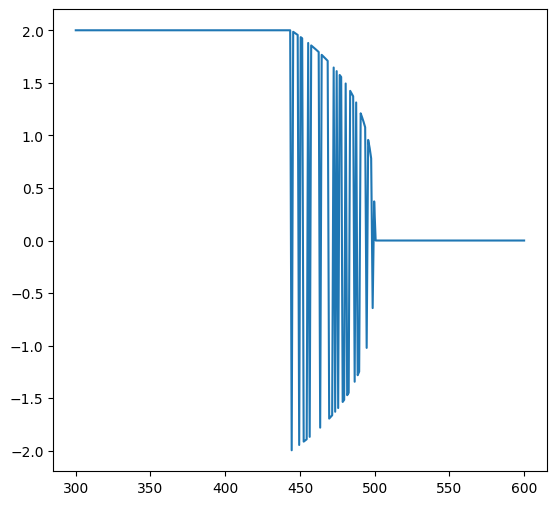

In [10]:
# Interpolating theoretical results to match experimental temperatures
exp_temps = experimental_data.columns.astype(float)
interp_order_param = np.interp(exp_temps, df_theory['Temperature'], df_theory['Order_Parameter'])
interp_free_energy = np.interp(exp_temps, df_theory['Temperature'], df_theory['Free_Energy'])

# Plot comparison of experimental and theoretical results
plt.figure(figsize=(14, 6))

# Order Parameter
plt.subplot(1, 2, 1)
plt.plot(df_theory['Temperature'], df_theory['Order_Parameter'], label='Theoretical Order Parameter')
for temp in exp_temps:
    plt.plot([temp]*len(experimental_data), experimental_data[temp], 'o', label=f'Exp Data at {temp}K')
plt.xlabel('Temperature (K)')
plt.ylabel('Order Parameter / Intensity')
plt.title('Order Parameter vs Temperature')
plt.legend()

# Free Energy
plt.subplot(1, 2, 2)
plt.plot(df_theory['Temperature'], df_theory['Free_Energy'], label='Theoretical Free Energy', color='r')
plt.plot(exp_temps, interp_free_energy, 'o', label='Interpolated Free Energy', color='b')
plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy')
plt.title('Free Energy vs Temperature')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Load the generated data
df = pd.read_csv('landau_data.csv')

# Combine experimental data and theoretical data for machine learning
# Example: Using theoretical order parameter as feature and experimental intensity as target
combined_data = pd.concat([df_theory[['Temperature', 'Order_Parameter']], experimental_data], axis=1)
combined_data = combined_data.dropna()

# Split data into features and target
X = combined_data[['Temperature', 'Order_Parameter']]
y = combined_data.drop(columns=['Temperature', 'Order_Parameter'])

# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

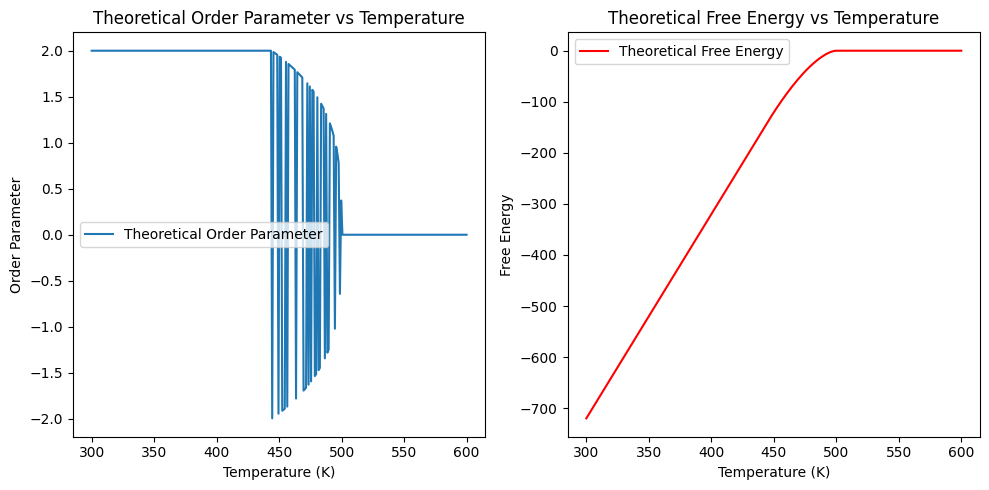

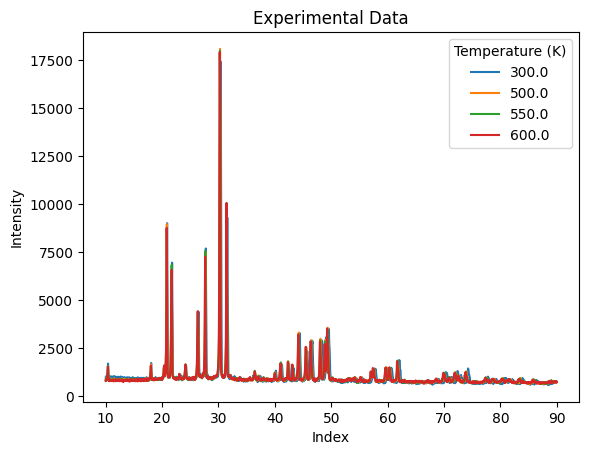

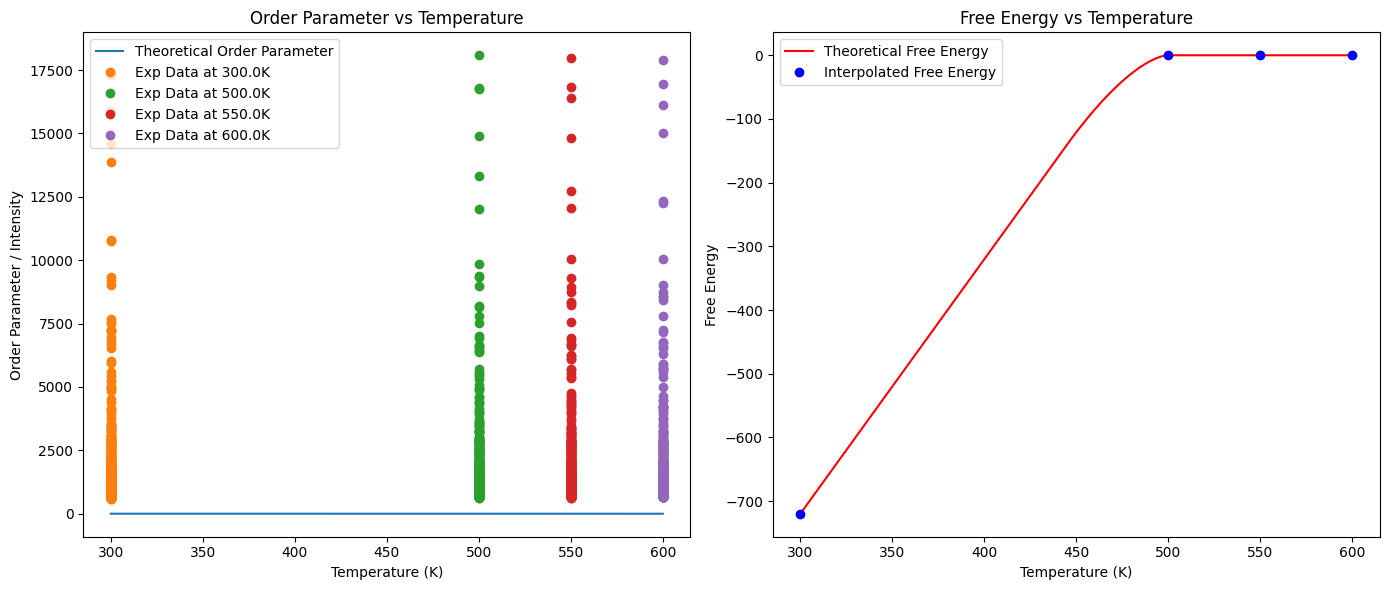

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load experimental data
experimental_data = pd.read_csv('experimental_data.csv', index_col=0)
experimental_data.columns = experimental_data.columns.astype(float)

# Parameters for the Landau model
a0 = 1.0
b = 1.0
c = 1.0
Tc = 500  # Critical temperature

# Define the free energy function
def free_energy(phi, T):
    a_T = a0 * (T - Tc)
    return a_T * phi**2 + b * phi**4 + c * phi**6

# Temperature range for simulation
temperatures = np.linspace(300, 600, 300)

# Find the order parameter that minimizes the free energy for each temperature
data = []

for T in temperatures:
    # Use a range of initial guesses to ensure we find a meaningful minimum
    initial_guesses = [0, 0.1, -0.1, 1, -1]
    results = [minimize(free_energy, guess, args=(T,), bounds=[(-2, 2)]) for guess in initial_guesses]
    # Choose the result with the lowest free energy
    best_result = min(results, key=lambda res: res.fun)
    phi = best_result.x[0]
    F = best_result.fun
    data.append([T, phi, F])

# Convert to DataFrame
df_theory = pd.DataFrame(data, columns=['Temperature', 'Order_Parameter', 'Free_Energy'])

# Plot theoretical results for verification
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df_theory['Temperature'], df_theory['Order_Parameter'], label='Theoretical Order Parameter')
plt.xlabel('Temperature (K)')
plt.ylabel('Order Parameter')
plt.title('Theoretical Order Parameter vs Temperature')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_theory['Temperature'], df_theory['Free_Energy'], label='Theoretical Free Energy', color='r')
plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy')
plt.title('Theoretical Free Energy vs Temperature')
plt.legend()

plt.tight_layout()
plt.show()

# Plot experimental data for verification
experimental_data.plot()
plt.title('Experimental Data')
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.legend(title='Temperature (K)')
plt.show()

# Interpolating theoretical results to match experimental temperatures
exp_temps = experimental_data.columns.values
interp_order_param = np.interp(exp_temps, df_theory['Temperature'], df_theory['Order_Parameter'])
interp_free_energy = np.interp(exp_temps, df_theory['Temperature'], df_theory['Free_Energy'])

# Plot comparison of experimental and theoretical results
plt.figure(figsize=(14, 6))

# Order Parameter
plt.subplot(1, 2, 1)
plt.plot(df_theory['Temperature'], df_theory['Order_Parameter'], label='Theoretical Order Parameter')
for temp in exp_temps:
    plt.plot([temp] * len(experimental_data), experimental_data[temp], 'o', label=f'Exp Data at {temp}K')
plt.xlabel('Temperature (K)')
plt.ylabel('Order Parameter / Intensity')
plt.title('Order Parameter vs Temperature')
plt.legend()

# Free Energy
plt.subplot(1, 2, 2)
plt.plot(df_theory['Temperature'], df_theory['Free_Energy'], label='Theoretical Free Energy', color='r')
plt.plot(exp_temps, interp_free_energy, 'o', label='Interpolated Free Energy', color='b')
plt.xlabel('Temperature (K)')
plt.ylabel('Free Energy')
plt.title('Free Energy vs Temperature')
plt.legend()

plt.tight_layout()
plt.show()
